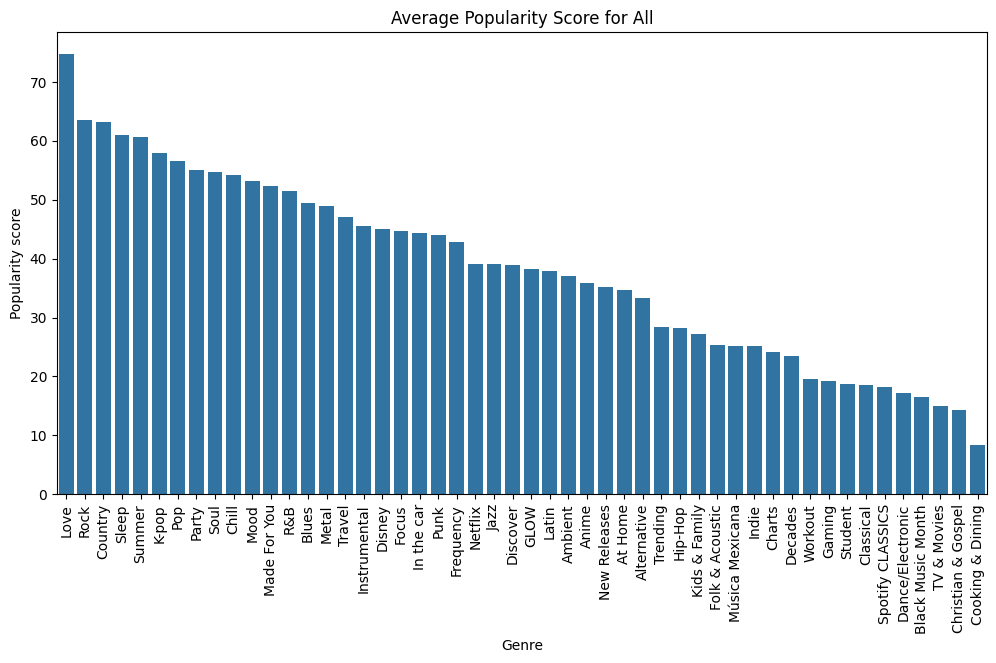

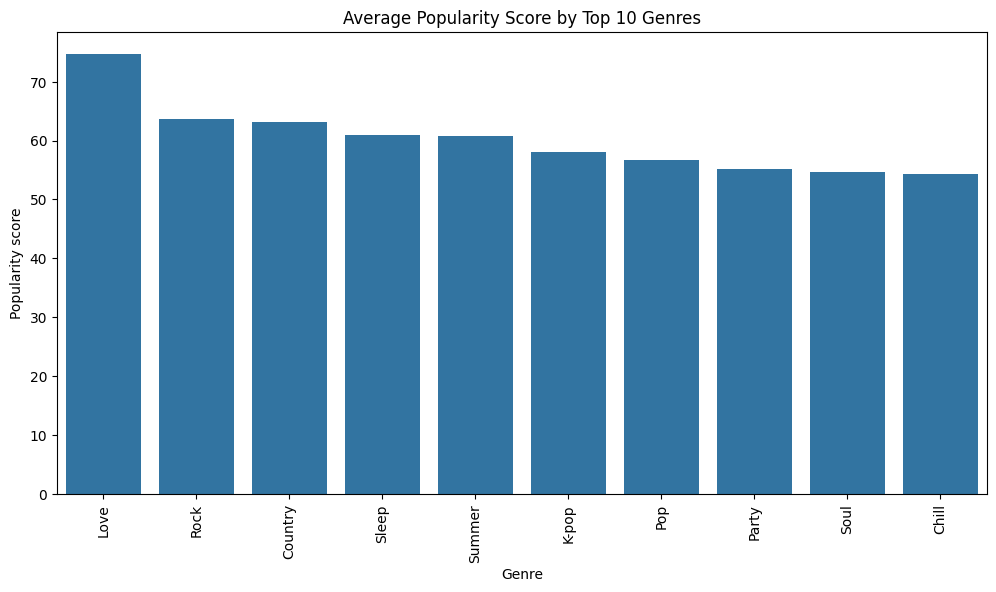

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

spotify = pd.read_csv("spotify.csv")

genre_popularity = spotify.groupby("Genre")["Popularity score"].mean().reset_index()
genre_popularity = genre_popularity.sort_values("Popularity score", ascending=False)

# Average Popularity Score 
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Popularity score', data=genre_popularity)
plt.xticks(rotation=90)
plt.title('Average Popularity Score for All')
plt.show()

# Average Popularity Score for Top 10 Genres
top_10_genres = genre_popularity.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Popularity score', data=top_10_genres)
plt.xticks(rotation=90)
plt.title('Average Popularity Score by Top 10 Genres')
plt.show()

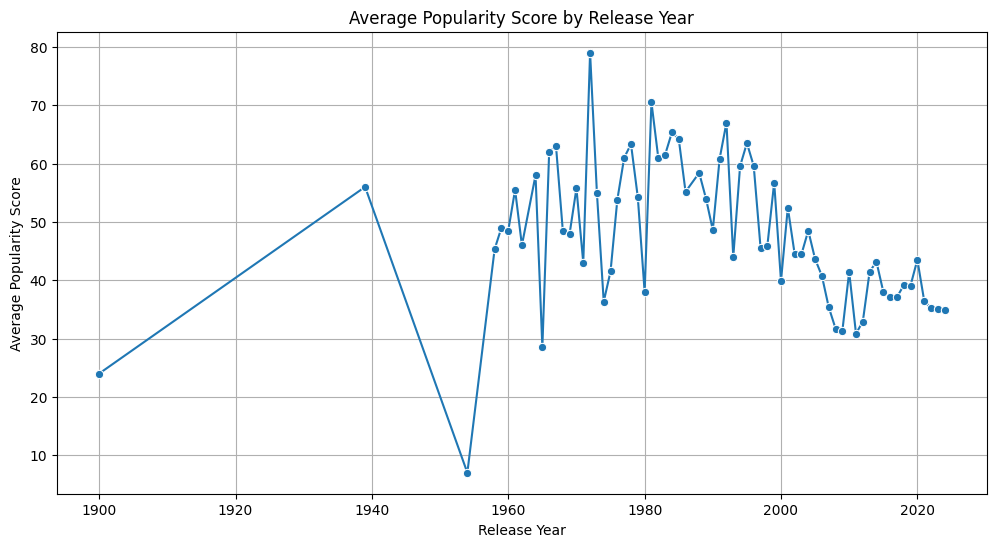

In [31]:
yearly_popularity = spotify.groupby("Release year")["Popularity score"].mean().reset_index()

# Create a line plot for the average popularity score by release year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release year', y='Popularity score', data=yearly_popularity, marker='o')
plt.title('Average Popularity Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity Score')
plt.grid(True)
plt.show()

In [35]:

# Assuming 'filtered_df' is your DataFrame
# Convert the 'Release year' column to int for proper sorting
spotify['Release year'] = spotify['Release year'].astype(int)

# Calculate the average popularity score for each release year and genre
year_genre_popularity = spotify.groupby(['Release year', 'Genre'])['Popularity score'].mean().reset_index()

# Pivot the DataFrame to create a matrix where rows correspond to release year, columns to genre, and cell values to popularity
popularity_matrix = year_genre_popularity.pivot('Release year', 'Genre', 'Popularity score')

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(popularity_matrix, cmap='YlGnBu')
plt.title('Average Popularity Score by Release year and Genre')
plt.show()


TypeError: pivot() takes 1 positional argument but 4 were given

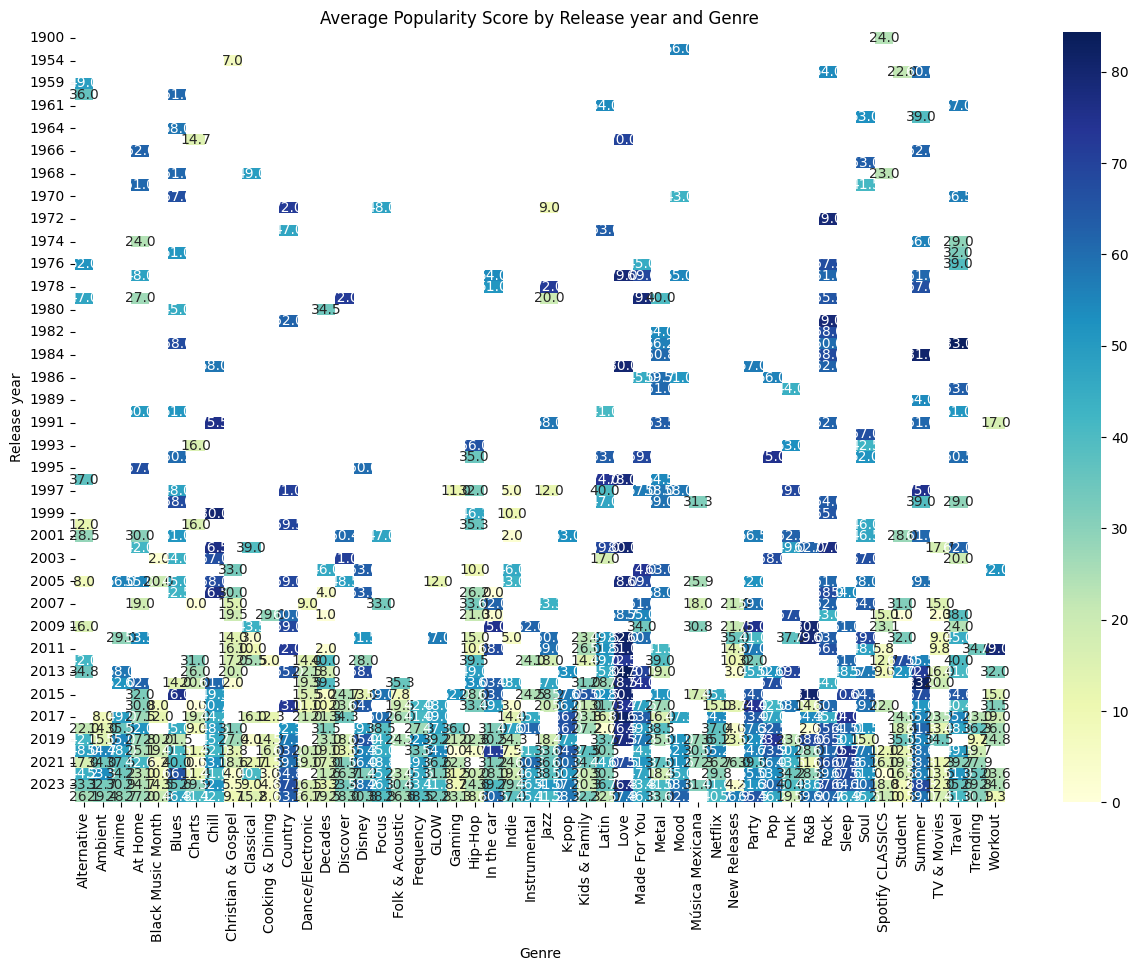

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'filtered_df' is your DataFrame
# Convert the 'Release Year' column to int for proper sorting
spotify['Release year'] = spotify['Release year'].astype(int)

# Calculate the average popularity score for each release year and genre
year_genre_popularity = spotify.groupby(['Release year', 'Genre'])['Popularity score'].mean().reset_index()

# Pivot the DataFrame to create a matrix where rows correspond to release year, columns to genre, and cell values to popularity
popularity_matrix = year_genre_popularity.pivot(index='Release year', columns='Genre', values='Popularity score')

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(popularity_matrix, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Average Popularity Score by Release year and Genre')
plt.show()


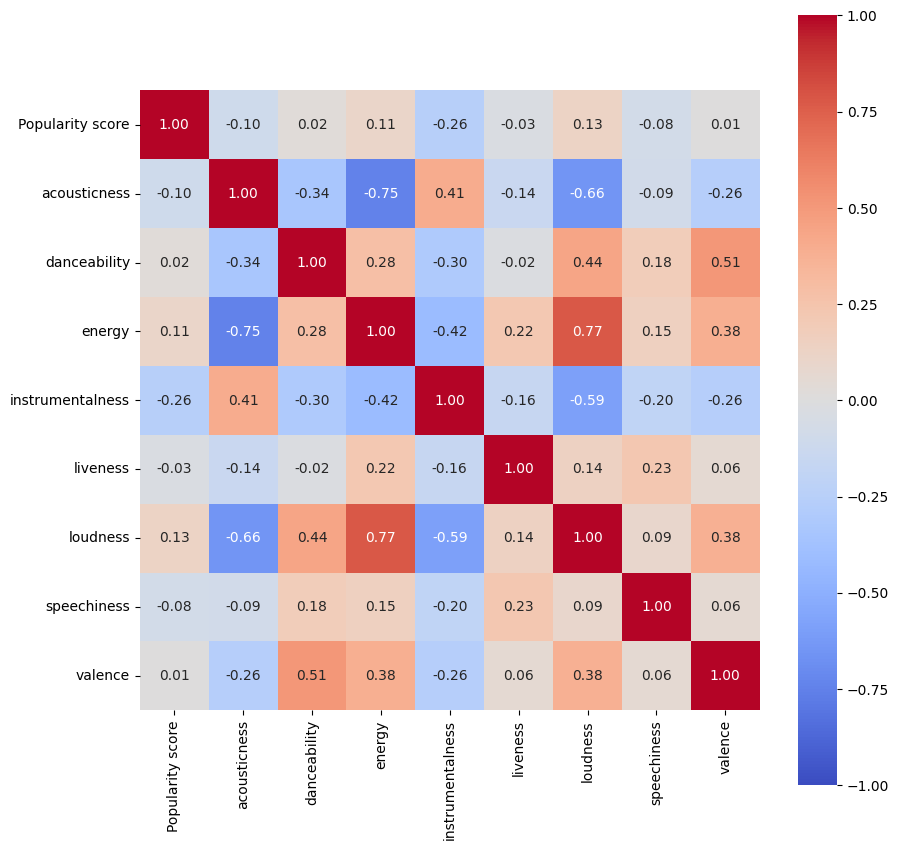

In [39]:
final = pd.read_csv("final.csv")

# Define the features you're interested in
features = ['Popularity score', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

# Calculate the correlation matrix
corr_matrix = final[features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, square=True)
plt.show()


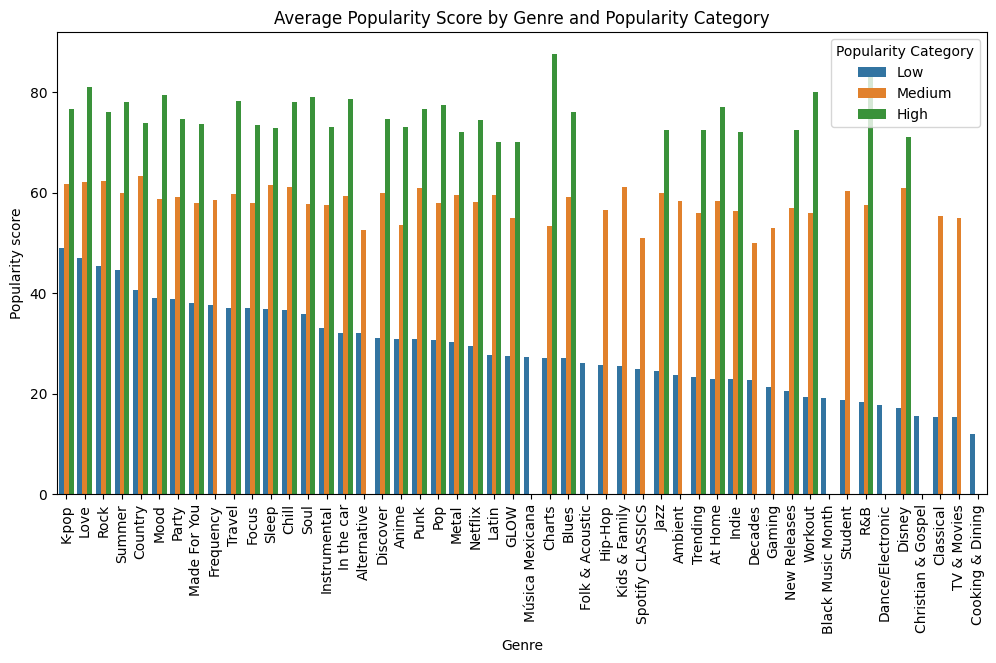

In [40]:
# Define the bins and labels
bins = [0, 49, 69, 100]  # Define the bins
labels = ['Low', 'Medium', 'High']  # Define the labels for the bins

# Add 'Popularity Category' to the original DataFrame
final['Popularity Category'] = pd.cut(final['Popularity score'], bins=bins, labels=labels)

# Calculate the average popularity score for each genre and popularity category
genre_popularity = final.groupby(['Genre', 'Popularity Category'])['Popularity score'].mean().reset_index()

# Sort the genres by average popularity score in descending order
genre_popularity = genre_popularity.sort_values(['Popularity Category', 'Popularity score'], ascending=[True, False])

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Popularity score', hue='Popularity Category', data=genre_popularity)
plt.xticks(rotation=90)
plt.title('Average Popularity Score by Genre and Popularity Category')
plt.show()
